In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
def kmeans(X, n_clusters, max_iters=3000):
    centroids = X[np.random.choice(range(X.shape[0]), n_clusters, replace=False)]
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        new_centroids = np.zeros_like(centroids)
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = X[np.random.choice(range(X.shape[0]))]
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids   
    return labels

In [39]:
encoded_df = pd.read_csv('../../prepare_dataset/data/dataset_new_cat.csv')
X = encoded_df.drop(['density'], axis=1)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [40]:
pca.explained_variance_ratio_.sum() > 0.95

True

In [47]:
labels = kmeans(X_pca, 3)

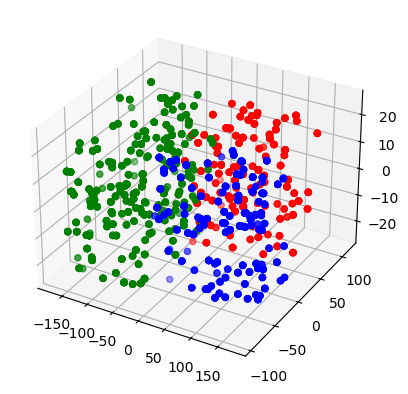

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i in range(3):
    cluster_points = X_pca[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[i])
plt.show()

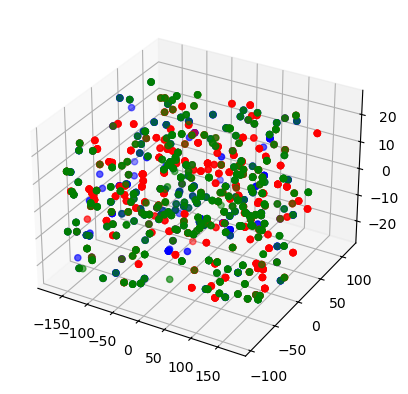

In [54]:
# now color according to density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i in range(3):
    cluster_points = X_pca[encoded_df['density'] == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[i])
plt.show()